In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
# import xgcm

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 62.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44653,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 62.81 GiB
Comm: tcp://127.0.0.1:38799,Total threads: 2
Dashboard: http://127.0.0.1:35585/status,Memory: 15.70 GiB
Nanny: tcp://127.0.0.1:36921,


In [3]:
import datetime
import nc_time_axis

In [4]:
import cftime

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy
import matplotlib.path as mpath

In [6]:
Wprime_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-gridW_prime_interp/*gridWprime.nc"
Wprime_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-gridW_prime_interp/*gridWprime.nc"

In [7]:
Bprime_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-BUOY_prime/*BUOYprime.nc"
Bprime_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-BUOY_prime/*BUOYprime.nc"

In [8]:
def prepro(ds):
    return ds.isel(y=slice(800, None))

In [9]:
grid_files = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc"
coords_file = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/coordinates_CREG12_lbclnk_noz_vh20160930.nc"
mask_file= "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc"

In [10]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=prepro)
coords = xr.open_mfdataset(coords_file, parallel=True, preprocess=prepro)
mask = xr.open_mfdataset(mask_file, parallel=True, preprocess=prepro)

In [15]:
Wprime_REF = xr.open_mfdataset(Wprime_data_filesREF, parallel=True, decode_cf=False)
Wprime_REF = Wprime_REF.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})
Wprime_REF = Wprime_REF.chunk({"depthw": 1, "x":395, "y":501})

Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID
Exception ignored in: <function CachingFileManager.__del__ at 0x7efd9b2680d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jma

In [17]:
Wprime_FUT= xr.open_mfdataset(Wprime_data_filesFUT, parallel=True, decode_cf=False)
Wprime_FUT = Wprime_FUT.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})
Wprime_FUT = Wprime_FUT.chunk({"depthw": 1, "x":395, "y":501})

Exception ignored in: <function CachingFileManager.__del__ at 0x7efd9b2680d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID
Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jma

In [18]:
Wprime_REF = Wprime_REF.rename({"depthw":"deptht"})
Wprime_FUT = Wprime_FUT.rename({"depthw":"deptht"})

In [19]:
import pandas as pd

In [20]:
def prepro(ds):
    filepath = ds.encoding['source']
    issues_files = ["2001m12d31", "2014m12d31", "2015m12d31", "2063m12d31"]
    if issues_files[0] in filepath or issues_files[1] in filepath  or issues_files[2] in filepath or issues_files[3] in filepath:
        date = "2020m12d31"
    else:
        date = filepath.split("_y")[1].split(".")[0]
    year = date.split("m")[0]
    month = date.split("m")[1].split("d")[0]
    day = date.split("d")[1]
    
    time = pd.Timestamp("{0}-{1}-{2}T12".format(year,month,day))
    ds['time_counter'] = np.atleast_1d(time)
    
    return ds.isel(y=slice(800, None))

In [21]:
Bprime_REF= xr.open_mfdataset(Bprime_data_filesREF, preprocess=prepro, parallel=True,decode_times=False,concat_dim='time_counter', combine='nested')
Bprime_REF = Bprime_REF.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})
Bprime_REF = Bprime_REF.chunk({"deptht": 1, "x":395, "y":501})

Exception ignored in: <function CachingFileManager.__del__ at 0x7efd9b2680d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID
Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jma

In [22]:
Bprime_FUT= xr.open_mfdataset(Bprime_data_filesFUT, preprocess=prepro, parallel=True,decode_times=False,concat_dim='time_counter', combine='nested')
Bprime_FUT = Bprime_FUT.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})
Bprime_FUT = Bprime_FUT.chunk({"deptht": 1, "x":395, "y":501})

Exception ignored in: <function CachingFileManager.__del__ at 0x7efd9b2680d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID
Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jma

In [23]:
Bprime_REF = Bprime_REF.sortby("time_counter").isel(time_counter=slice(0,-3))

In [24]:
# [cftime.num2date(time.values,"seconds since 1900-01-01") for time in Bprime_REF.time_counter][-100::]

In [25]:
Bprime_REF['time_counter'] = Wprime_REF.time_counter.values

In [26]:
Bprime_FUT = Bprime_FUT.sortby("time_counter").isel(time_counter=slice(1,None))

In [27]:
Bprime_FUT['time_counter'] = Wprime_FUT.time_counter.values

In [28]:
# Bprime_REF_mean =  Bprime_REF.cv_bn2.mean("time_counter").compute()

In [29]:
wb_p_REF =  Wprime_REF.vovecrtz * Bprime_REF.cv_bn2
wb_p_FUT =  Wprime_FUT.vovecrtz * Bprime_FUT.cv_bn2

In [30]:
wb_p_REF

<xarray.DataArray (deptht: 75, time_counter: 1457, x: 1580, y: 1001)> Size: 691GB
dask.array<mul, shape=(75, 1457, 1580, 1001), dtype=float32, chunksize=(1, 1, 395, 501), chunktype=numpy.ndarray>
Coordinates:
  * deptht        (deptht) float32 300B 0.5058 1.556 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) float64 12kB 3.028e+09 3.028e+09 ... 3.658e+09
    nav_lon       (y, x) float32 6MB dask.array<chunksize=(501, 395), meta=np.ndarray>
    nav_lat       (y, x) float32 6MB dask.array<chunksize=(501, 395), meta=np.ndarray>
Dimensions without coordinates: x, y

In [31]:
cftime.num2date(3027672000,"seconds since 1900-01-01")

cftime.DatetimeGregorian(1995, 12, 11, 12, 0, 0, 0, has_year_zero=False)

In [32]:
time = [cftime.num2date(time.values,"seconds since 1900-01-01") for time in wb_p_REF.time_counter]
wb_p_REF['time_counter']=time

In [33]:
time = [cftime.num2date(time.values,"seconds since 1900-01-01") for time in wb_p_FUT.time_counter]
wb_p_FUT['time_counter']=time

In [34]:
wb_p_REF.time_counter[1450::]

<xarray.DataArray 'time_counter' (time_counter: 7)> Size: 56B
array([cftime.DatetimeGregorian(2015, 10, 28, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 11, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 11, 7, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 11, 12, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 11, 17, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 11, 22, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2015, 11, 27, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time_counter  (time_counter) object 56B 2015-10-28 12:00:00 ... 2015-11-2...

In [35]:
# output = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-W_prime_B_prime/"

# for time in wb_p_REF.time_counter[860::]:
#     date = str(time.values)[0:10]
#     print(date)
#     year,month,day = date.split("-")
    
#     data = wb_p_REF.sel(time_counter=time)
#     data.to_netcdf(output+"CREG12.L75-REF08_y{0}m{1}d{2}.5d_WprimeBprime.nc".format(year,month,day))

In [36]:
# output = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-W_prime_B_prime/"

# for time in wb_p_FUT.time_counter:
#     date = (str(time.values)[0:10])
#     print(date)
#     year,month,day = date.split("-")
    
#     data = wb_p_FUT.sel(time_counter=time)
#     data.to_netcdf(output+"CREG12.L75-FUT08_y{0}m{1}d{2}.5d_WprimeBprime.nc".format(year,month,day))

In [37]:
WpBp_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-W_prime_B_prime/*.5d_WprimeBprime.nc"

WpBp_REF = xr.open_mfdataset(WpBp_filesREF, parallel=True, concat_dim='time_counter', combine='nested')
WpBp_REF = WpBp_REF.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})
WpBp_REF = WpBp_REF.chunk({"deptht": 5, "x":395, "y":501})

Exception ignored in: <function CachingFileManager.__del__ at 0x7efd9b2680d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID
Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jma

In [38]:
mean_WpBp_REF = WpBp_REF.mean('time_counter').compute()

/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/distributed/client.py:3169: UserWarning: Sending large graph of size 31.82 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


In [39]:
WpBp_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-W_prime_B_prime/*.5d_WprimeBprime.nc"

WpBp_FUT = xr.open_mfdataset(WpBp_filesFUT, parallel=True, concat_dim='time_counter', combine='nested')
WpBp_FUT = WpBp_FUT.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})
WpBp_FUT = WpBp_FUT.chunk({"deptht": 5, "x":395, "y":501})

Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


In [40]:
mean_WpBp_FUT = WpBp_FUT.mean('time_counter').compute()

/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/distributed/client.py:3169: UserWarning: Sending large graph of size 31.87 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


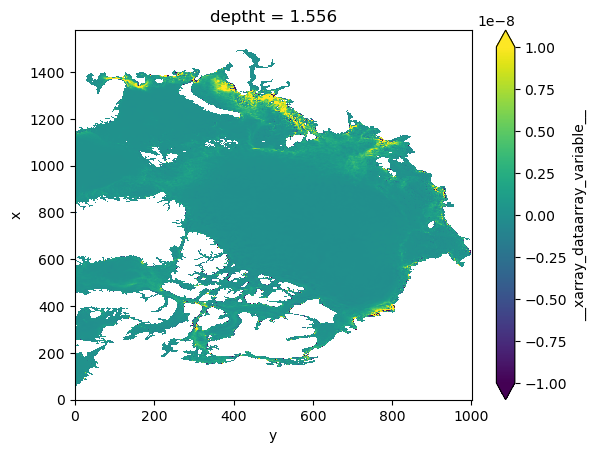

In [41]:
mean_WpBp_FUT.isel(deptht=1).__xarray_dataarray_variable__.plot(vmin=-1e-8,vmax=1e-8)

Chapter 1 When you say variable, do you mean properties, or location?
Is the AAIW links the super gyre?  Intensification and shift polewards, but the properties remain the same? 
Higher resolution represents better the northward transport of the AAIW. What about the vertical resolution?
Eddies play an important role at mid latitude.


Exception ignored in: <function CachingFileManager.__del__ at 0x7f6a099b40d0>
Traceback (most recent call last):
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


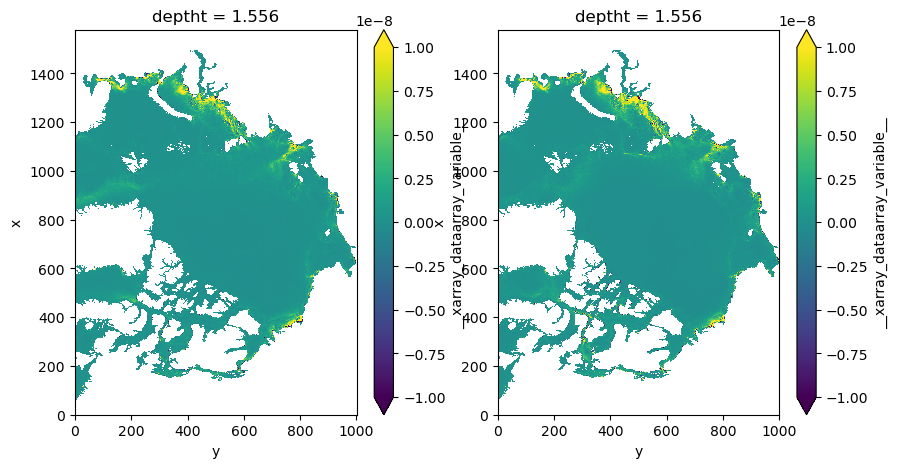

In [42]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

mean_WpBp_REF.isel(deptht=1).__xarray_dataarray_variable__.plot(ax=ax[0],vmin=-1e-8,vmax=1e-8)

mean_WpBp_FUT.isel(deptht=1).__xarray_dataarray_variable__.plot(ax=ax[1],vmin=-1e-8,vmax=1e-8)


In [43]:
mean_WpBp_REF.to_netcdf("/data0/project/drakkar/USERS/jrieck/wp_bp_REF_clim.nc")

In [44]:
mean_WpBp_FUT.to_netcdf("/data0/project/drakkar/USERS/jrieck/wp_bp_FUT_clim.nc")